# Holiday personalisation -- complete notebook

In [1]:
# For reading and transforming data
import pandas as pd 
import numpy as np

# For plotting data
import matplotlib.pyplot as plt 
import seaborn as sns

# For training our decision tree and plotting it
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import graphviz

## Binary Classification Problem
### Will our customers, who signed up, book a holiday?

In [4]:
binary = pd.read_csv('book_binary - book_binary.csv')

binary.head()

,age,first_device_type,gender,signup_app,signup_method,Month_name,book?,month_looking,children,signup_location
0,38,Mac Desktop,MALE,Web,facebook,May,No,Mar,5,North America
1,56,Windows Desktop,FEMALE,Web,basic,Sep,Yes,Mar,2,North America
2,46,Mac Desktop,FEMALE,Web,basic,Jan,Yes,Jul,4,North America
3,47,Mac Desktop,FEMALE,Web,basic,Jan,Yes,Feb,2,North America
4,50,Mac Desktop,FEMALE,Web,basic,Jan,Yes,Apr,1,Europe


In [5]:
binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90520 entries, 0 to 90519
Data columns (total 10 columns):
age                  90520 non-null int64
first_device_type    90520 non-null object
gender               90520 non-null object
signup_app           90520 non-null object
signup_method        90520 non-null object
Month_name           90520 non-null object
book?                90520 non-null object
month_looking        90520 non-null object
children             90520 non-null int64
signup_location      90520 non-null object
dtypes: int64(2), object(8)
memory usage: 6.9+ MB


In [6]:
binary.describe()

,age,children
count,90520.000000,90520.000000
mean,36.748840,2.496796
std,11.648066,1.701335
min,16.000000,0.000000
25%,28.000000,1.000000
50%,34.000000,2.000000
75%,43.000000,4.000000
max,95.000000,5.000000


/Users/alaa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


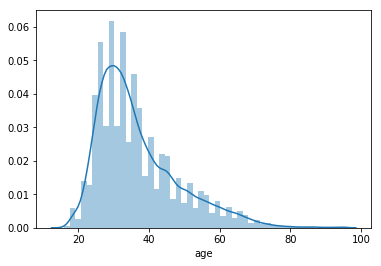

In [7]:
sns.distplot(binary['age'])

In [9]:
binary.columns

Index(['age', 'first_device_type', 'gender', 'signup_app', 'signup_method',
       'Month_name', 'book?', 'month_looking', 'children', 'signup_location'],
      dtype='object')

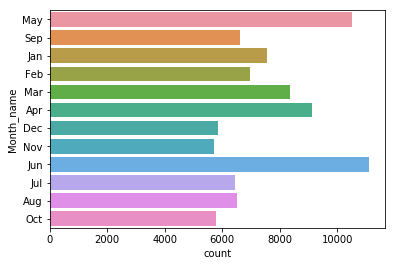

In [12]:
sns.countplot(y = 'Month_name', data= binary)

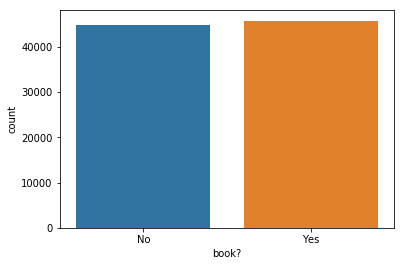

In [13]:
sns.countplot('book?', data= binary)

Now that we made some very basic plots to get an idea of how our data looks, let's go ahead and train a decision tree.

Split into training and testing

In [14]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(binary.drop(['book?'], axis=1),  
                                                           binary['book?'],
                                                           test_size = 0.3, random_state = 123)


In [15]:
x_train_bin = pd.get_dummies(x_train_bin)

x_test_bin = pd.get_dummies(x_test_bin)

In [16]:
tree_bin = DecisionTreeClassifier(max_depth = 3)

tree_bin.fit(x_train_bin, y_train_bin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
# Use graphviz to plot our decision tree
def plotTree():
    dot_data = export_graphviz(tree_bin, 
                                    out_file=None, 
                                    feature_names=x_train_bin.columns,
                                    filled=True, 
                                    rounded=True, class_names = ['No','Yes'])
    graph = graphviz.Source(dot_data)
    return graph 

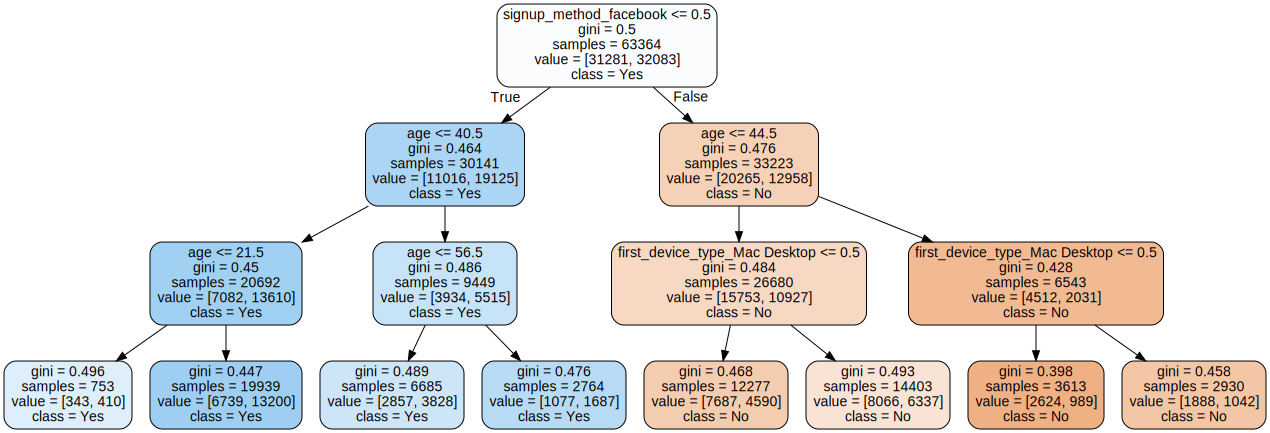

In [36]:
plotTree()

## Multiple Classification Problem
###  To further personalise our services for those customers whom we predict will book a holiday,  can we predict where they'll go?

In [21]:
multiple = pd.read_csv('multiple - multiple.csv')

multiple.head()

,age,first_device_type,gender,signup_app,signup_method,Month_name,Continent,month_looking,children,signup_location
0,56,Windows Desktop,FEMALE,Web,basic,Sep,North America,Mar,5,Europe
1,46,Mac Desktop,FEMALE,Web,basic,Jan,North America,Mar,2,Europe
2,47,Mac Desktop,FEMALE,Web,basic,Jan,North America,Jul,4,Europe
3,50,Mac Desktop,FEMALE,Web,basic,Jan,North America,Feb,2,Europe
4,36,Mac Desktop,FEMALE,Web,basic,Jan,North America,Apr,1,North America


In [25]:
multiple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45739 entries, 0 to 45738
Data columns (total 10 columns):
age                  45739 non-null int64
first_device_type    45739 non-null object
gender               45739 non-null object
signup_app           45739 non-null object
signup_method        45739 non-null object
Month_name           45739 non-null object
Continent            45739 non-null object
month_looking        45739 non-null object
children             45739 non-null int64
signup_location      45739 non-null object
dtypes: int64(2), object(8)
memory usage: 3.5+ MB


/Users/alaa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


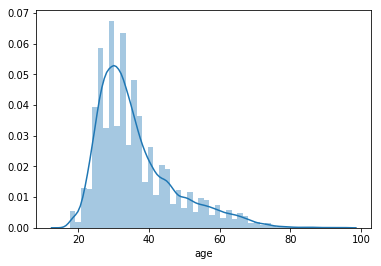

In [26]:
sns.distplot(multiple['age'])

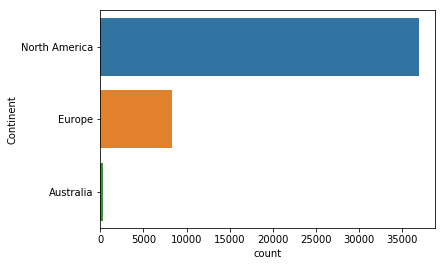

In [27]:
sns.countplot(y = 'Continent', data = multiple)

As before, we now split into training/testing and plot our decision tree

In [28]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(multiple.drop(['Continent'], axis=1),  
                                                           multiple['Continent'],
                                                           test_size = 0.3, random_state = 123)


In [29]:
x_train_multi = pd.get_dummies(x_train_multi)

x_test_multi = pd.get_dummies(x_test_multi)

In [30]:
tree_multi = DecisionTreeClassifier(max_depth = 3)

tree_multi.fit(x_train_multi, y_train_multi)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
y_train_multi.value_counts()

North America    25908
Europe            5870
Australia          239
Name: Continent, dtype: int64

In [37]:
def plotTree2():
    dot_data = export_graphviz(tree_multi, 
                                    out_file=None, 
                                    feature_names=x_train_bin.columns,
                                    filled=True, 
                                    rounded=True,  class_names = ['Australia', 'Europe','North America'])
    graph = graphviz.Source(dot_data)
    return graph 

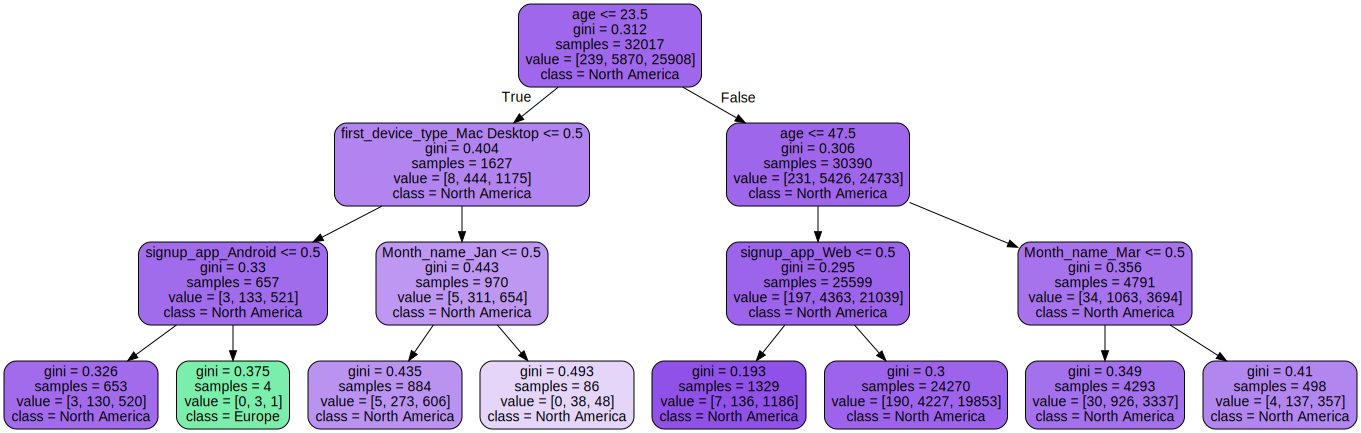

In [38]:
plotTree2()